In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as ios

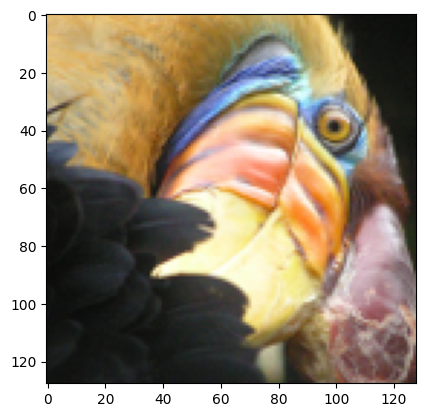

In [2]:
path = 'bird_small.png'
image = io.imread(path)
plt.imshow(image)

In [3]:
path1='bird_small.mat'
data = ios.loadmat(path1)
A = data['A']
print(A)

[[[219 180 103]
  [230 185 116]
  [226 186 110]
  ...
  [ 14  15  13]
  [ 13  15  12]
  [ 12  14  12]]

 [[230 193 119]
  [224 192 120]
  [226 192 124]
  ...
  [ 16  16  13]
  [ 14  15  10]
  [ 11  14   9]]

 [[228 191 123]
  [228 191 121]
  [220 185 118]
  ...
  [ 14  16  13]
  [ 13  13  11]
  [ 11  15  10]]

 ...

 [[ 15  18  16]
  [ 18  21  18]
  [ 18  19  16]
  ...
  [ 81  45  45]
  [ 70  43  35]
  [ 72  51  43]]

 [[ 16  17  17]
  [ 17  18  19]
  [ 20  19  20]
  ...
  [ 80  38  40]
  [ 68  39  40]
  [ 59  43  42]]

 [[ 15  19  19]
  [ 20  20  18]
  [ 18  19  17]
  ...
  [ 65  43  39]
  [ 58  37  38]
  [ 52  39  34]]]


In [4]:
def find_centors(X,centors):
    idx = []
    for i in range(len(X)):
        idx.append(np.argmin(np.linalg.norm(X[i]-centors,axis=1)))
    return np.array(idx)

In [5]:
def computer_centors(X,idx,k):
    new_centors=[]
    for i in range(k):
        new_centors.append(list(np.mean(X[idx==i],axis=0)))
    return np.array(new_centors)

In [6]:
def run_kmean(X,centors,iter):
    k=len(centors)
    centors_i = centors
    for i in range(iter):
        new_idx = find_centors(X,centors_i)
        centors_i = computer_centors(X,new_idx,k)
    return centors_i,new_idx

In [7]:
def init_c(X,k):
    index = np.random.choice(len(X),k)
    return X[index]

In [8]:
A = A / 255
A = A.reshape(-1,3)
k=16
init_centors = init_c(A,16)
centors,idx = run_kmean(A,init_centors,iter=20)
im = np.zeros(A.shape)
for i in range(k):
    im[idx==i] = centors[i]
print(A.shape)

(16384, 3)


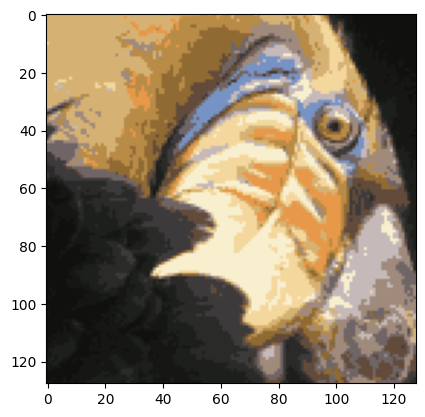

In [9]:
im = im.reshape(128,128,3)
plt.imshow(im)

In [14]:
idx = np.array([1,1,2])
X = np.array([[1,2],[3,4],[5,6]])
for i in range(3):
    print(X[idx==i])

[]
[[1 2]
 [3 4]]
[[5 6]]
